# Projekt 4 - Uczenie Preferencji

Wojciech Kot 151879
Oskar Kiliańczyk 151863

In [ ]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Opis zbioru danych
Zbior wybrany z podanych przykladowych do uzycia. Employee selection posiada 488 intancji,4 atrybuty decyzyjne oraz 9 klas. Klasy to liczby calkowite od 1 do 9. Tak jak mowi zadanie klasy zostaly zbinaryzowane wedlug przyjetego formatu - klasa >= 5 => klasa 1, w przeciwnym wypadku klasa 0.

Rozkład klas: \
1 - 336 \
0 - 152

Wszystkie wartosci kryteriow zostaly uprzednio znormalizowane w samym zbiorze. Nie ma zadnej informacji o tym czym sa dane kryteria - nie jest jednoznacznie okreslone czy cos jest typu koszt czy zysk.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/employee selection.csv", header=None)

df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']

print("Pierwsze 5 wierszy danych:")
print(df.head())

print("\nUnikalne wartości klasy (przed binarnością):")
print(df['class_raw'].unique())

min_class = df['class_raw'].min()
max_class = df['class_raw'].max()
print(f"\nMin klasa: {min_class}, Max klasa: {max_class}")

df['class'] = (df['class_raw'] >= 5).astype(int)

df = df.drop(columns=['class_raw'])

print("\nPo binarnej klasyfikacji:")
print(df.head())

print("\nRozkład klas:")
print(df['class'].value_counts())


Pierwsze 5 wierszy danych:
   criterion_1  criterion_2  criterion_3  criterion_4  class_raw
0     0.666667     0.555556     0.666667     0.666667        6.0
1     0.555556     0.444444     0.500000     0.500000        5.0
2     0.555556     0.333333     0.333333     0.500000        4.0
3     0.666667     0.555556     0.666667     0.833333        6.0
4     0.444444     0.333333     0.166667     0.500000        3.0

Unikalne wartości klasy (przed binarnością):
[6. 5. 4. 3. 2. 7. 8. 1. 9.]

Min klasa: 1.0, Max klasa: 9.0

Po binarnej klasyfikacji:
   criterion_1  criterion_2  criterion_3  criterion_4  class
0     0.666667     0.555556     0.666667     0.666667      1
1     0.555556     0.444444     0.500000     0.500000      1
2     0.555556     0.333333     0.333333     0.500000      0
3     0.666667     0.555556     0.666667     0.833333      1
4     0.444444     0.333333     0.166667     0.500000      0

Rozkład klas:
class
1    336
0    152
Name: count, dtype: int64


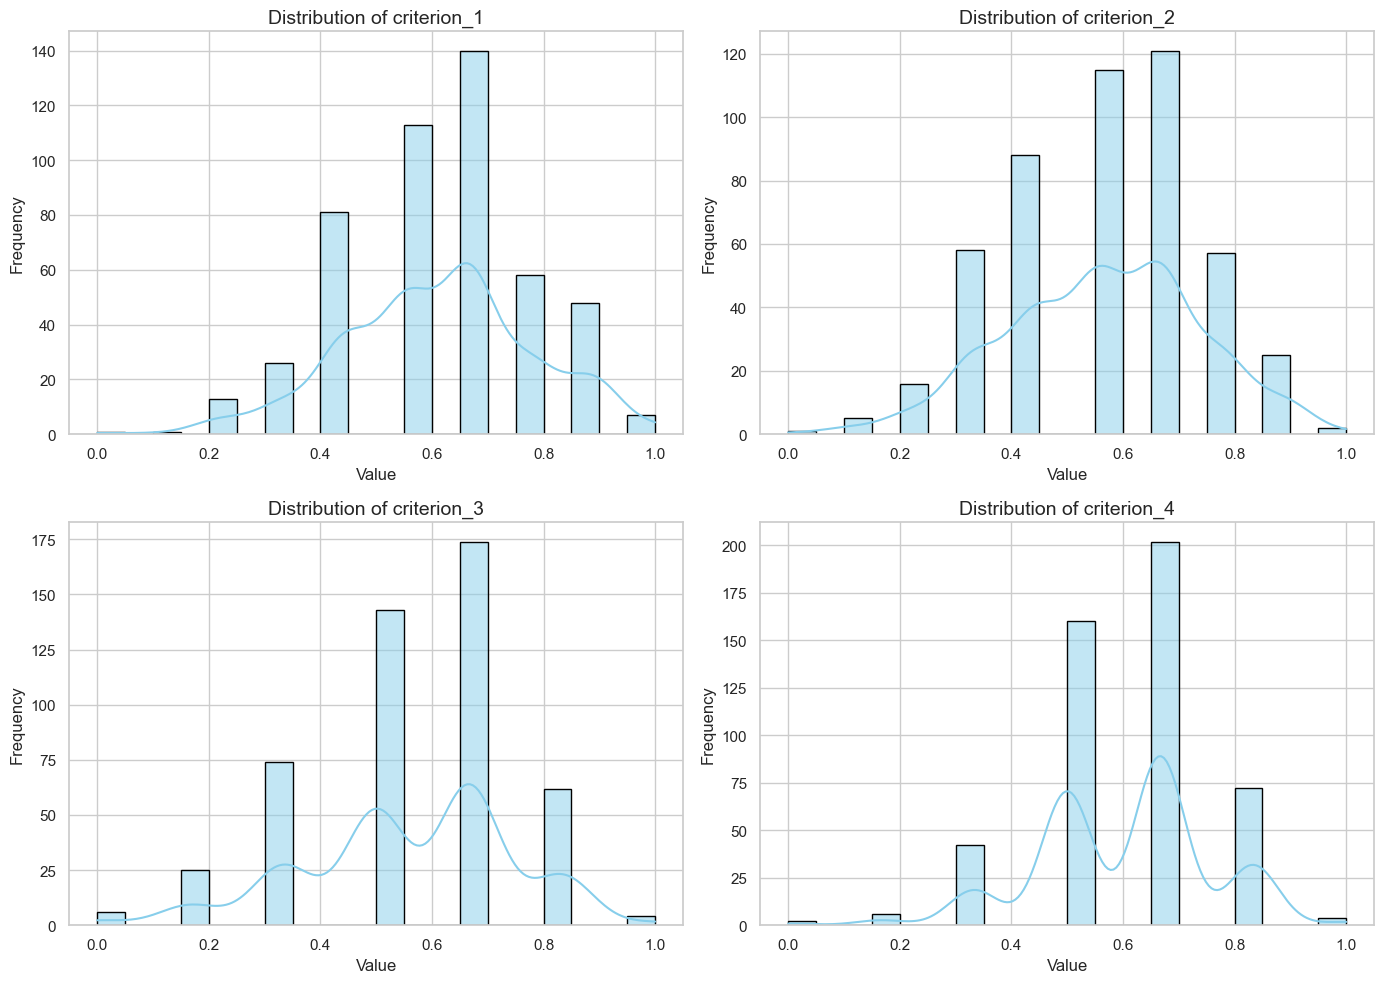

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

criteria = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

for i, criterion in enumerate(criteria, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[criterion], kde=True, bins=20, color="skyblue", edgecolor="black")
    plt.title(f'Distribution of {criterion}', fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Regresja logistyczna

Accuracy: 0.9116
F1 Score: 0.9378
AUC: 0.9566


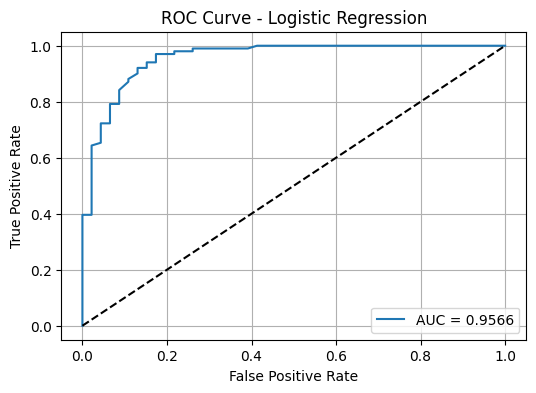

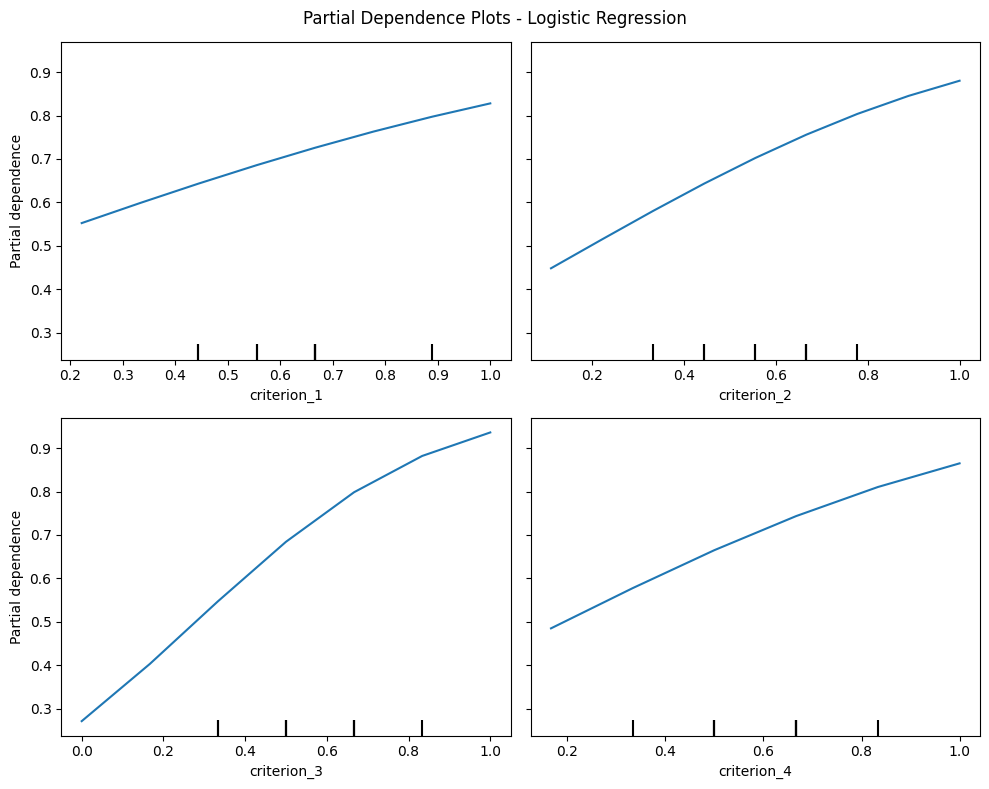


Wagi modelu (im wyższy współczynnik, tym większy wpływ):
criterion_1: 2.6221
criterion_2: 3.5214
criterion_3: 4.6685
criterion_4: 3.3985


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/employee selection.csv", header=None)
df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']
df['class'] = (df['class_raw'] >= 5).astype(int)

X = df[['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = round(accuracy_score(y_test, y_pred), 4)
f1 = round(f1_score(y_test, y_pred), 4)
auc = round(roc_auc_score(y_test, y_proba), 4)

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
PartialDependenceDisplay.from_estimator(model, X_test, [0, 1, 2, 3], ax=ax)
plt.suptitle("Partial Dependence Plots - Logistic Regression")
plt.tight_layout()
plt.show()

print("\nWagi modelu (im wyższy współczynnik, tym większy wpływ):")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {round(coef, 4)}")



Wybrane 3 losowe próbki do interpretacji SHAP:

     criterion_1  criterion_2  criterion_3  criterion_4
236     0.666667     0.555556     0.500000     0.666667
363     1.000000     0.888889     0.666667     0.833333
230     0.444444     0.333333     0.333333     0.500000

Interpretacja próbki indeks 236:
{'criterion_1': 0.666667, 'criterion_2': 0.555556, 'criterion_3': 0.5, 'criterion_4': 0.666667}
Prawdopodobieństwo klasy 1: 0.792
Przewidywana klasa: 1


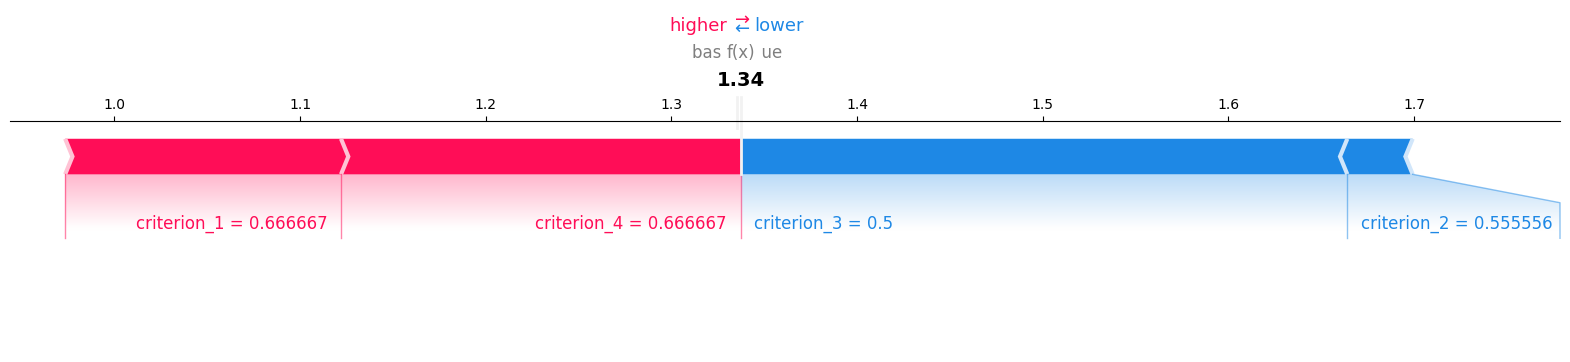

SHAP criterion_1: 0.1486
SHAP criterion_2: -0.0352
SHAP criterion_3: -0.3268
SHAP criterion_4: 0.2152

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: -0.2864
  nowa wartość cechy: 0.2136
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 0
----

Interpretacja próbki indeks 363:
{'criterion_1': 1.0, 'criterion_2': 0.888889, 'criterion_3': 0.666667, 'criterion_4': 0.833333}
Prawdopodobieństwo klasy 1: 0.9912
Przewidywana klasa: 1


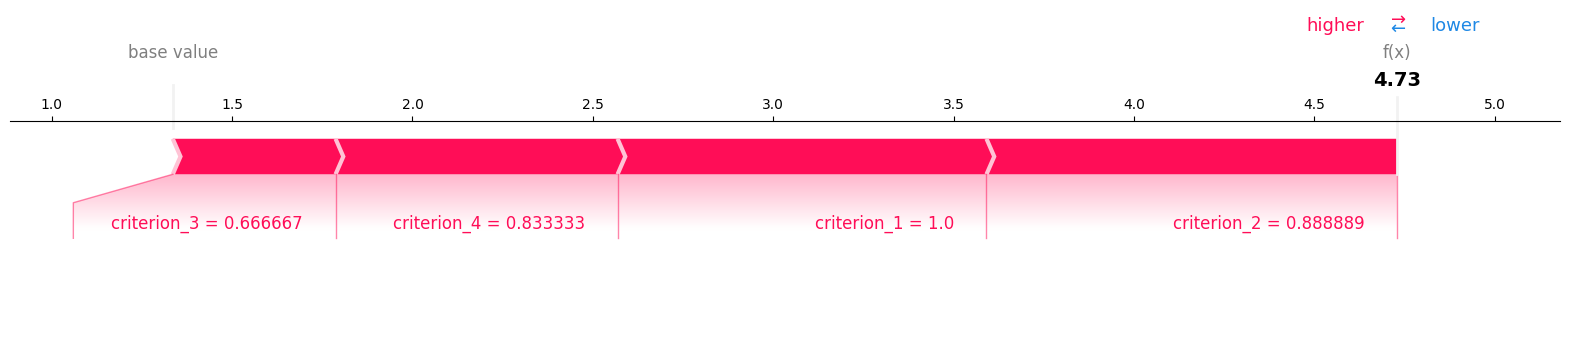

SHAP criterion_1: 1.0226
SHAP criterion_2: 1.1386
SHAP criterion_3: 0.4513
SHAP criterion_4: 0.7816

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: -1.0131
  nowa wartość cechy: -0.3464
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 1
----

Interpretacja próbki indeks 230:
{'criterion_1': 0.444444, 'criterion_2': 0.333333, 'criterion_3': 0.333333, 'criterion_4': 0.5}
Prawdopodobieństwo klasy 1: 0.2022
Przewidywana klasa: 0


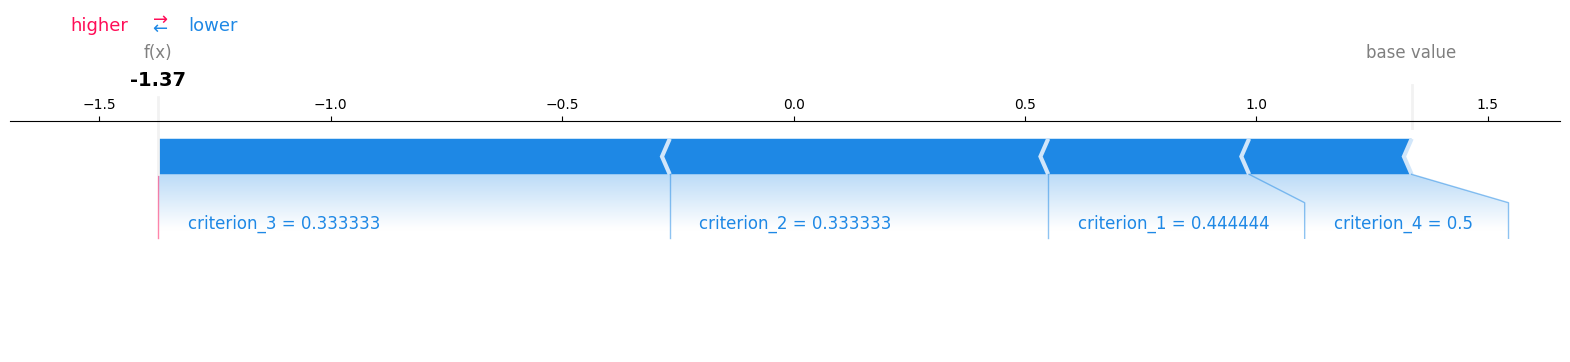

SHAP criterion_1: -0.4341
SHAP criterion_2: -0.8177
SHAP criterion_3: -1.1049
SHAP criterion_4: -0.3512

Minimalna zmiana cechy aby zmienić klasę:
  cecha: criterion_3
  zmiana: 0.294
  nowa wartość cechy: 0.6273
Nowe prawdopodobieństwo klasy 1: 0.5
Nowa przewidywana klasa: 1
----


In [ ]:
import shap
import random

explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

random.seed(42)
sample_indices = random.sample(list(X_test.index), 3)
samples = X_test.loc[sample_indices]

print("\nWybrane 3 losowe próbki do interpretacji SHAP:\n")
print(samples)

def minimal_change_to_flip(instance, model, threshold=0.5):
    coefs = model.coef_[0]
    intercept = model.intercept_[0]
    x = instance.values
    logit = np.dot(coefs, x) + intercept
    pred_class = int((1/(1+np.exp(-logit))) >= threshold)

    min_change = None
    min_feature = None

    for i, feat in enumerate(X.columns):
        coef = coefs[i]
        if coef == 0:
            continue
        delta = -logit / coef
        if min_change is None or abs(delta) < abs(min_change):
            min_change = delta
            min_feature = feat
    return min_feature, min_change

for idx in sample_indices:
    instance = X_test.loc[idx]
    print(f"\nInterpretacja próbki indeks {idx}:\n{instance.to_dict()}")

    shap_values = explainer.shap_values(instance)
    base_value = explainer.expected_value

    logit = np.dot(model.coef_[0], instance.values) + model.intercept_[0]
    prob = 1 / (1 + np.exp(-logit))
    pred_class = int(prob >= 0.5)

    print(f"Prawdopodobieństwo klasy 1: {round(prob,4)}")
    print(f"Przewidywana klasa: {pred_class}")

    shap.initjs()
    shap.force_plot(base_value, shap_values, instance, matplotlib=True, show=True)

    for f, v in zip(X.columns, shap_values):
        print(f"SHAP {f}: {round(v,4)}")

    feat, delta = minimal_change_to_flip(instance, model)
    print(f"\nMinimalna zmiana cechy aby zmienić klasę:")
    print(f"  cecha: {feat}")
    print(f"  zmiana: {round(delta,4)}")
    print(f"  nowa wartość cechy: {round(instance[feat] + delta, 4)}")

    changed_instance = instance.copy()
    changed_instance[feat] += delta
    logit_changed = np.dot(model.coef_[0], changed_instance.values) + model.intercept_[0]
    prob_changed = 1 / (1 + np.exp(-logit_changed))
    pred_changed = int(prob_changed >= 0.5)
    print(f"Nowe prawdopodobieństwo klasy 1: {round(prob_changed,4)}")
    print(f"Nowa przewidywana klasa: {pred_changed}")
    print("----")


Model regresji logistycznej uzyskał następujące wyniki w klasyfikacji binarnej:

Accuracy: 0.9116  
F1 Score: 0.9378  
AUC: 0.9566

Model wykazuje bardzo dobrą skuteczność, zwłaszcza w kontekście wysokiej wartości AUC, co sugeruje wysoką zdolność rozróżniania między klasami.

Wizualizacje ROC curve oraz PDP powyżej.

Wagi modelu (im wyższy współczynnik, tym większy wpływ):  
criterion_1: 2.6221  
criterion_2: 3.5214  
criterion_3: 4.6685  
criterion_4: 3.3985

Pokazują duży wpływ kryterium nr 3, oraz również wysoki aczkolwiek nie aż tak kryteriów 2 i 4.

### Przypadek 1 — indeks 236  
**Wartości cech:**  
criterion_1: 0.6667, criterion_2: 0.5556, criterion_3: 0.5000, criterion_4: 0.6667

Wszystkie kryteria zostały potraktowane jako zysk, ze względu na brak informacji o nich.  
Dane są znormalizowane, a wszystkie kryteria są większe równe 0.5, co na logikę dla zbinaryzowanych klas powinno zaklasyfikować ją do klasy 1.

**Predykcja modelu:** Klasa 1  
**Prawdopodobieństwo klasy 1:** 0.792

Aby zmienić tę decyzję i zejść do prawdopodobieństwa równego 0.5 najprościej zapewne obniżyć kryterium 3 (ze względu na podobieństwo rozkładu wartości kryteriów – patrz analiza danych), ze względy na jego najwyższy wpływ.

**Wkład cech wg SHAP:**

| Kryterium   | SHAP value |
|-------------|------------|
| criterion_1 | +0.1486    |
| criterion_2 | –0.0352    |
| criterion_3 | –0.3268    |
| criterion_4 | +0.2152    |

**Minimalna zmiana prowadząca do zmiany klasy:**  
Aby zmienić predykcję na klasę 0, wystarczy obniżyć criterion_3 o 0.2864 (do poziomu 0.2136).  
Nowe prawdopodobieństwo wynosi 0.5, a decyzja zmienia się na klasę 0. Praktycznie sam wpływ tego kryterium wymusi zmianę predykcji.

---

### Przypadek 2 — indeks 363  
**Wartości cech:**  
criterion_1: 1.0, criterion_2: 0.8889, criterion_3: 0.6667, criterion_4: 0.8333

Wszystkie kryteria są na praktycznie maksymalnych poziomach co bardzo mocno wskazuje, że jest to przypadek z klasy 1. Rozkład kryterium 3 wskazuje na standardową wartość, która nie powinna przeważyć nad predykcją.

**Predykcja modelu:** Klasa 1  
**Prawdopodobieństwo klasy 1:** 0.9912

Ponownie, największe oddziaływanie ma kryterium 3 oraz jego średnia wartość z rozkładu wartości.  
Dostatecznie duże obniżenie poziomu wartości będzie najbardziej skuteczne, aczkolwiek wpływ pozostałych kryteriów może być znaczący i niewystarczający do zmiany klasy.

**Wkład cech wg SHAP:**

| Kryterium   | SHAP value |
|-------------|------------|
| criterion_1 | +1.0226    |
| criterion_2 | +1.1386    |
| criterion_3 | +0.4513    |
| criterion_4 | +0.7816    |

**Minimalna zmiana prowadząca do zmiany klasy:**  
W tym przypadku, nawet duża zmiana criterion_3 (o –1.0131 do wartości –0.3464) obniża prawdopodobieństwo tylko do 0.5, ale model nadal klasyfikuje przypadek jako klasa 1.  
Sugeruje to bardzo silne, skumulowane oddziaływanie pozostałych kryteriów.

---

### Przypadek 3 — indeks 230  
**Wartości cech:**  
criterion_1: 0.4444, criterion_2: 0.3333, criterion_3: 0.3333, criterion_4: 0.5

Niskie wartości kryteriów, znacząco poniżej poziomów średnich dla poszczególnych z nich.  
Niewątpliwie klasa powinna wynieść 0.

**Predykcja modelu:** Klasa 0  
**Prawdopodobieństwo klasy 1:** 0.2022 (poniżej 0.5 a więc około 0.3 pewności że klasa jest równa 0)

Kryterium 3 znajduje się znacząco poniżej średniego progu a jego zwiększenie powinno znowu wywrzeć największy wpływ, ze względu na najwyższą wagę.

**Wkład cech wg SHAP:**

| Kryterium   | SHAP value |
|-------------|------------|
| criterion_1 | –0.4341    |
| criterion_2 | –0.8177    |
| criterion_3 | –1.1049    |
| criterion_4 | –0.3512    |

**Minimalna zmiana prowadząca do zmiany klasy:**  
Zwiększenie criterion_3 o 0.294 (do wartości 0.6273) wystarcza, by osiągnąć prawdopodobieństwo 0.5 i zmienić decyzję na klasa 1.

---

### Czy na podstawie uzyskanych parametrów możemy powiedzieć coś o preferencjach użytkowników?

Tak, niewątpliwie kryterium 3 gra pierwsze skrzypce jeśli chodzi o wybór.  
Losowo wybrana próbka 3 przykładów wskazuje jednoznacznie jego ważność.  
Analiza wag również to wykazała.

### Jaki jest wpływ każdego z kryteriów. Czy są jakieś kryteria, które nie mają żadnego znaczenia, czy też mają wpływ decydujący?

Wpływ i wagi kryteriów zostały wymienione wyżej.  
Kryterium pseudo-dominującym jest kryterium 3.  
Nie można jednak powiedzieć że któreś z nich nie ma żadnego wpływu, ponieważ nawet stosunek najlepszego do najgorszego (C3:C1) ma się w stosunku ~1.78.

### Jaki jest charakter danego kryterium: zysk, koszt, niemonotoniczne?

Wszystkie kryteria są typu zysk monotonicznie rosnące.

### Czy istnieją jakieś progi preferencji? Czy istnieją oceny kryteriów, które są nierozróżnialne z punktu widzenia preferencji?

Kryterium 2 i 4 różni się w stosunku o około 3-4%.  
Ich wykresy są praktycznie jednakowe a stosunek wag niewiele znaczący.  
Z punktu widzenia preferencji nadal model wagowy wskazuje wyższość wartości jednej wagi nad drugą, ale mieści się to w granicy dopuszczalnego błędu, by uznać je przy pewnym progu za nierozróżnialne w sferze kryterium samego w sobie.

Analiza wyników regresji oraz wartości SHAP pozwala stwierdzić, że istnieją progi preferencji, tj. zmiany wartości cech, które są konieczne, by zmienić przewidywaną klasę.  
Dla przykładu, cecha criterion_3 w próbce 230 wymaga wzrostu o około 0.29, aby zmienić klasę z 0 na 1, co stanowi empiryczny próg preferencji.  
Ponadto, niewielkie zmiany w niektórych cechach (np. < 0.1) nie wpływają na klasyfikację, co sugeruje istnienie zakresów nierozróżnialności preferencyjnej, czyli ocen cech traktowanych przez model jako równoważne.

### Czy wyniki uzyskane z tych technik pokrywają się się z analizą wykonaną w poprzednim punkcie?

Powyżej metoda PDP wykazuje zwyczajne oddziaływania wag dla rozkładu cech.  
Ciężko mówić tutaj o pokryciu z analizą, bo to po prostu suma ważona, której wagę na kryterium 3 wykorzystujemy na swoją korzyść.  
Logicznym więc jest, że dla pewnych progów sumy ważonej będzie to klasyfikacja do jednej lub drugiej klasy zależna od rozkładu.  
Wiadomym więc jest, że dla małych, nieznaczących wiele zmian efekt może być nierozróżnialny ze stanem poprzednim (zmieni się co najwyżej pewność predykcji, ale nie sama predykcja), a dla znaczących i dużych zmian może to być diametralna zmiana.  
Pod tym względem, tak wyniki uzyskane pokrywają się z analizą.


## ANN-MCDA

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
ANN-UTADIS (odcinkowo liniowy, monotoniczny)
Accuracy: 0.8707
F1 Score: 0.9082
AUC: 0.9256


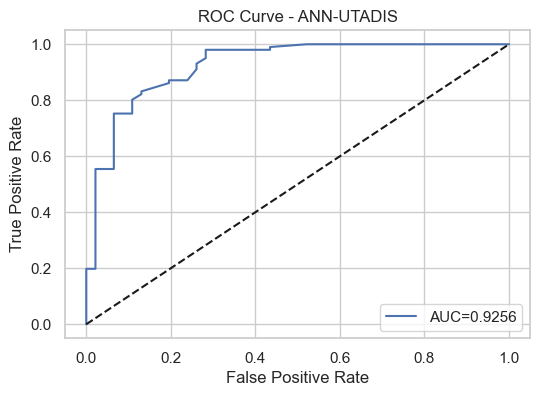

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


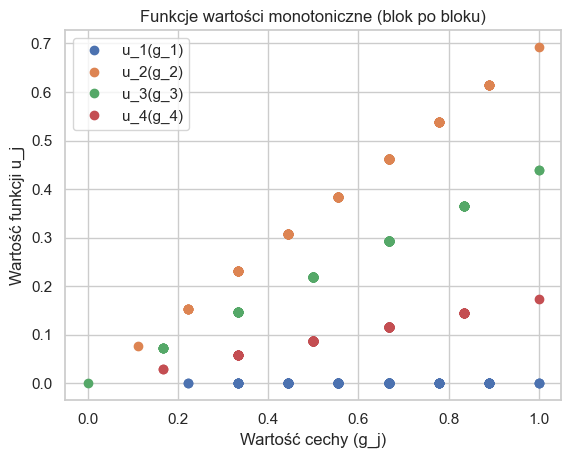

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Concatenate, Add, Lambda
from tensorflow.keras.constraints import NonNeg
import matplotlib.pyplot as plt

df = pd.read_csv("data/employee selection.csv", header=None)
df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class_raw']
df['class'] = (df['class_raw'] >= 5).astype(int)

X = df[['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']].values
y = df['class'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

def monotonic_block(input_layer, segments=3):
    x = Dense(segments, activation='relu', use_bias=False, kernel_constraint=NonNeg())(input_layer)
    out = tf.keras.layers.Lambda(lambda z: tf.reduce_sum(z, axis=1, keepdims=True))(x)
    return out

inputs = [Input(shape=(1,)) for _ in range(4)]
outputs = [monotonic_block(inp) for inp in inputs]

summed = Add()(outputs)

model = Model(inputs=inputs, outputs=summed)
model.compile(optimizer='adam', loss='mse')

X_train_list = [X_train[:, i].reshape(-1, 1) for i in range(4)]
X_test_list = [X_test[:, i].reshape(-1, 1) for i in range(4)]

y_train_float = y_train.astype(float).reshape(-1,1)

history = model.fit(X_train_list, y_train_float, epochs=100, batch_size=16, verbose=0,
                    validation_split=0.2)

U_train = model.predict(X_train_list)
U_test = model.predict(X_test_list)

U_max = np.max(U_train)
U_min = np.min(U_train)

def normalize_U(U):
    return (U - U_min) / (U_max - U_min + 1e-9)

U_test_norm = normalize_U(U_test)

y_pred = (U_test_norm >= 0.5).astype(int).flatten()

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, U_test_norm)

print(f"ANN-UTADIS (odcinkowo liniowy, monotoniczny)\nAccuracy: {acc:.4f}\nF1 Score: {f1:.4f}\nAUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, U_test_norm)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN-UTADIS")
plt.legend()
plt.grid(True)
plt.show()

for i, out_block in enumerate(outputs):
    func_values = Model(inputs, out_block).predict(X_test_list)
    plt.plot(X_test[:, i], func_values, 'o', label=f'u_{i+1}(g_{i+1})')
plt.xlabel("Wartość cechy (g_j)")
plt.ylabel("Wartość funkcji u_j")
plt.title("Funkcje wartości monotoniczne (blok po bloku)")
plt.legend()
plt.show()


Wybrane warianty:
    kryterium1  kryterium2  kryterium3  kryterium4
4     0.444444    0.444444    0.333333    0.500000
58    0.555556    0.666667    0.500000    0.666667
20    0.666667    0.777778    0.833333    0.666667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predykcje klas i wartości użyteczności:
Wariant 4: Klasa=1, Użyteczność=0.5410
Wariant 58: Klasa=1, Użyteczność=0.7970
Wariant 20: Klasa=1, Użyteczność=1.0203

Testy zmiany cech wariantu 0:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Gradient zerowy, nie można wyliczyć minimalnej zmiany.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
 Kryterium kryterium2: minimalna zmiana = -0.0593, nowa klasa = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 Kryterium kryterium3: minimalna zmiana = -0.0929, nowa klasa = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 33%|███▎      | 1/3 [00:00<00:00,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 67%|██████▋   | 2/3 [00:00<00:00,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


SHAP values dla wariantu 4:


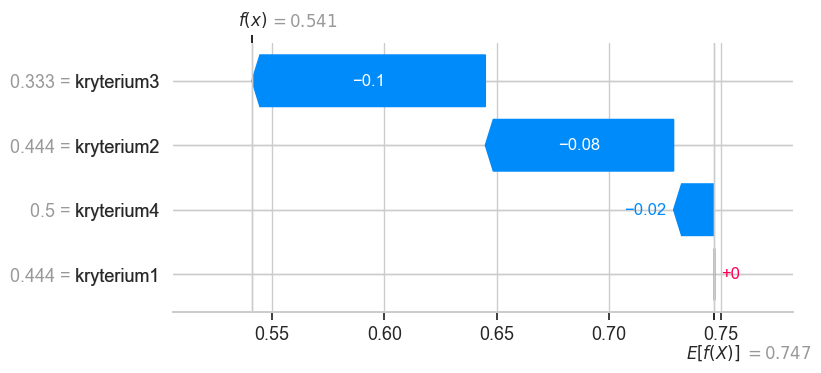


SHAP values dla wariantu 58:


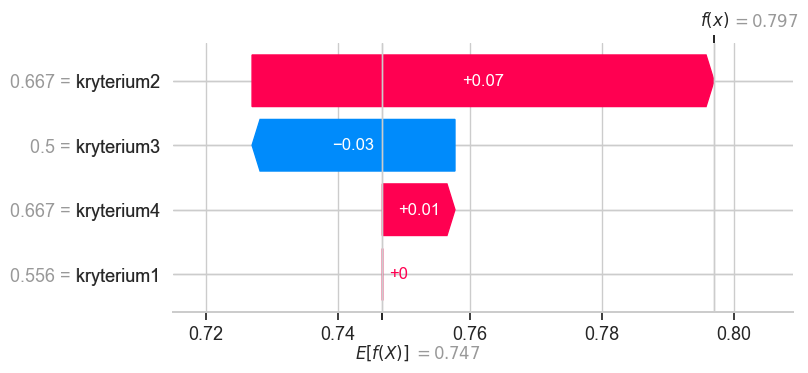


SHAP values dla wariantu 20:


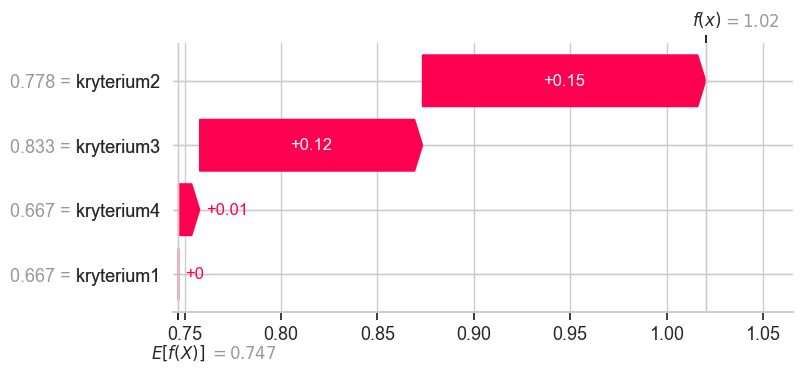

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

feature_names = ['kryterium1', 'kryterium2', 'kryterium3', 'kryterium4']

if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

np.random.seed(69)
indices = np.random.choice(len(X_test), size=3, replace=False)
selected_variants = X_test.iloc[indices]

print("Wybrane warianty:")
print(selected_variants)

def predict_class_ann_utadis(model, X, thresholds):
    X_inputs = [X.iloc[:, i].values.reshape(-1, 1) for i in range(X.shape[1])]
    utilities = model.predict(X_inputs).flatten()
    classes = np.digitize(utilities, bins=thresholds)
    return classes, utilities

thresholds = [0.5]

predicted_classes, utilities = predict_class_ann_utadis(model, selected_variants, thresholds)

print("\nPredykcje klas i wartości użyteczności:")
for i, idx in enumerate(indices):
    print(f"Wariant {idx}: Klasa={predicted_classes[i]}, Użyteczność={utilities[i]:.4f}")

def minimal_change_to_flip_class(model, x, current_class, thresholds, feature_idx):
    x_inputs = [x[i].reshape(1, 1) for i in range(len(x))]
    u = model.predict(x_inputs)[0, 0]
    
    if current_class == 0:
        target_threshold = thresholds[0]
    elif current_class == len(thresholds):
        target_threshold = thresholds[-1]
    else:
        upper = thresholds[current_class] if current_class < len(thresholds) else None
        target_threshold = upper
    
    eps = 1e-5
    x_up = x.copy()
    x_up[feature_idx] += eps
    x_up_inputs = [x_up[i].reshape(1, 1) for i in range(len(x_up))]
    u_up = model.predict(x_up_inputs)[0, 0]
    
    grad = (u_up - u) / eps
    if grad == 0:
        print("Gradient zerowy, nie można wyliczyć minimalnej zmiany.")
        return None
    
    delta_u = target_threshold - u
    minimal_delta_feature = delta_u / grad
    
    return minimal_delta_feature

def test_feature_change_and_predict(model, x, feature_idx, delta, thresholds):
    x_new = x.copy()
    x_new[feature_idx] += delta
    x_new_df = pd.DataFrame([x_new], columns=X_test.columns)
    return predict_class_ann_utadis(model, x_new_df, thresholds)[0][0]

for i in range(len(selected_variants)):
    print(f"\nTesty zmiany cech wariantu {i}:")
    for f_idx in range(len(X_test.columns)):
        delta = minimal_change_to_flip_class(model, selected_variants.iloc[i].values, predicted_classes[i], thresholds, f_idx)
        if delta is not None:
            new_class = test_feature_change_and_predict(model, selected_variants.iloc[i].values, f_idx, delta, thresholds)
            print(f" Kryterium {X_test.columns[f_idx]}: minimalna zmiana = {delta:.4f}, nowa klasa = {new_class}")

def f(X):
    X_inputs = [X[:, i].reshape(-1, 1) for i in range(X.shape[1])]
    preds = model.predict(X_inputs).flatten()
    return preds

explainer = shap.KernelExplainer(f, shap.utils.sample(X_train, 100))

shap_values = explainer.shap_values(selected_variants)

for i, idx in enumerate(indices):
    print(f"\nSHAP values dla wariantu {idx}:")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            data=selected_variants.iloc[i].values,
            feature_names=X_test.columns
        )
    )


R2 score surrogate model (train): 0.9129187569838128


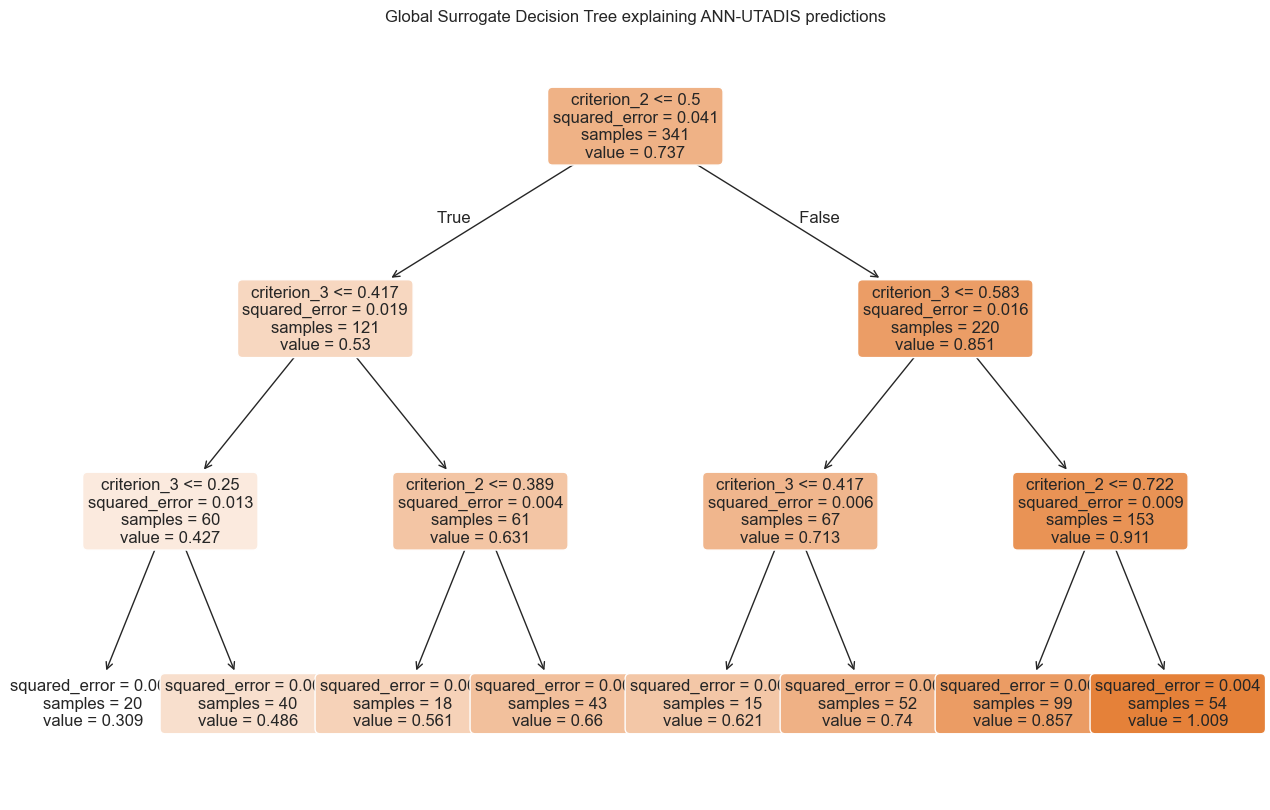

Ważność cechy criterion_1: 0.0000
Ważność cechy criterion_2: 0.7100
Ważność cechy criterion_3: 0.2900
Ważność cechy criterion_4: 0.0000


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

surrogate = DecisionTreeRegressor(max_depth=3, random_state=42)
surrogate.fit(X_train, U_train)

U_train_pred = surrogate.predict(X_train)
print("R2 score surrogate model (train):", r2_score(U_train, U_train_pred))

plt.figure(figsize=(16,10))
plot_tree(surrogate, feature_names=['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4'],
          filled=True, rounded=True, fontsize=12)
plt.title("Global Surrogate Decision Tree explaining ANN-UTADIS predictions")
plt.show()

importances = surrogate.feature_importances_
for f, imp in zip(['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4'], importances):
    print(f"Ważność cechy {f}: {imp:.4f}")


## Metryki modelu

- **Accuracy**: 0.8707  
- **F1 Score**: 0.9082  
- **AUC**: 0.9256  

## Ważność kryteriów

Pokazane funkcje częściowych użyteczności oraz drzewo utworzone na bazie modelu wskazują jednoznacznie ważności kryteriów.  
Funkcje częściowych użyteczności pokazują funkcje rosnące, gdzie **C2 > C3 > C4 > C1**, zaś drzewo o maksymalnej głębokości 2, przy wyuczonym modelu wskazuje na:

```
Ważność cechy criterion_1: 0.0000  
Ważność cechy criterion_2: 0.7100  
Ważność cechy criterion_3: 0.2900  
Ważność cechy criterion_4: 0.0000  
```

## Wybrane warianty:

```
    kryterium1  kryterium2  kryterium3  kryterium4
4     0.444444    0.444444    0.333333    0.500000
58    0.555556    0.666667    0.500000    0.666667
20    0.666667    0.777778    0.833333    0.666667
```

## Interpretacja wariantów

Skoro mamy informację odnośnie ważności kryteriów i rozkładu ich wartości wykorzystajmy je.  
**Kryterium 1** jest całkowicie zbędne i nierozpatrywane przez ten model, zaś **kryterium 4** jest mało znaczące (według drzewa nieznaczące, ale model rozpatruje je minimalnie).  
Skupmy się na najważniejszym kryterium tj. **kryterium 2**.

### Wariant 4

Niskie wartości (poniżej średnich i najwyższych szczytów) dla obu kryteriów. Ze względu na niezbalansowaną klasyfikację (~70% stanowi klasę 1) wartości poniżej 0.5 nie świadczą jednoznacznie o przydziale do klasy 0.  
Wariant jest na granicy między klasami i ciężko jednoznacznie wykazać co wskaże model.

### Wariant 58

Wartości obu znaczących kryteriów wynoszą ponad 0.5, co zaklasyfikuje przykład do klasy 1.

### Wariant 20

Wartości obu znaczących kryteriów są znacząco wysokie i powyżej swoich średnich rozkładów wartości, co na pewno zaklasyfikuje ten przykład do klasy 1.

## Predykcje klas modelu i wartości użyteczności:

```
Wariant 4:  Klasa = 1, Użyteczność = 0.5410  
Wariant 58: Klasa = 1, Użyteczność = 0.7970  
Wariant 20: Klasa = 1, Użyteczność = 1.0203  
```

Mając wiedzę o zerowej ingerencji wpływu na decyzję przez kryterium **C1**, za każdym razem nie musimy go brać pod uwagę.  
Nawet największa zmiana na **C1** nie spowoduje zmiany decyzji w klasyfikacji.

## Minimalna zmiana wartości cech

### Wariant 4

**Idea**: Ze względu na wagę kryterium 2, jak i bliskość do granicy klasy, wystarczy minimalnie zmniejszyć wartość na tym kryterium w celu zmiany klasyfikacji.

```
Gradient zerowy, nie można wyliczyć minimalnej zmiany.  
Kryterium2: zmiana = -0.0593 → nowa klasa = 0 - najmniejsza zmiana 
Kryterium3: zmiana = -0.0929 → nowa klasa = 1  
Kryterium4: zmiana = -0.2292 → nowa klasa = 1  
```

### Wariant 58

**Idea**: Ponownie opieramy się na wadze kryterium 2. Wystarczy zmniejszyć jego wpływ, by zmienić klasę.

```
Gradient zerowy, nie można wyliczyć minimalnej zmiany.  
Kryterium2: zmiana = -0.4259 → nowa klasa = 1 - najmniejsza zmiana 
Kryterium3: zmiana = -0.6734 → nowa klasa = 1  
Kryterium4: zmiana = -1.7182 → nowa klasa = 1  
```

### Wariant 20

**Idea**: Ponownie opieramy się na wadze kryterium 2. Wystarczy zmniejszyć jego wpływ, by zmienić klasę.

```
Gradient zerowy, nie można wyliczyć minimalnej zmiany.  
Kryterium2: zmiana = -0.7526 → nowa klasa = 0 - najmniejsza zmiana  
Kryterium3: zmiana = -1.1797 → nowa klasa = 1  
Kryterium4: zmiana = -2.9099 → nowa klasa = 1  
```

## Preferencje użytkowników

Ponownie widać preferencje przede wszystkim na jednym z kryteriów. Wszystkie przypadki wykazały i ważność wag, że **kryterium 2** jest najbardziej znaczącym.  
Jest to zmiana w porównaniu z regresją liniową, gdzie było to **kryterium 3**.  
Jednakże kryterium 3 nadal jest ważne i jest rozpatrywane jako drugie najbardziej znaczące kryterium w klasyfikacji.

## Wpływ kryteriów

Jak zauważyliśmy wcześniej:

- **Kryterium 1** nie ma żadnego wpływu na decyzję – co ukazuje funkcja użyteczności częściowych.
- **Kryterium 4** również nie ma większego wpływu w podejmowaniu decyzji (według drzewa).
- **Kryterium 2** jest bardzo ważne.
- **Kryterium 3** ma umiarkowany wpływ.

## Charakter kryteriów

Wszystkie kryteria są typu **zysk**, **monotonicznie rosnące**.

## Progi preferencji i nierozróżnialność

Z punktu widzenia preferencji:

- Nierozróżnialna jest jakakolwiek zmiana na **kryterium 1**, ponieważ ma zerowy udział w decyzji.
- **Progi preferencji** istnieją i pojawiają się tam, gdzie niewielka zmiana wartości cechy prowadzi do wyraźnej zmiany aktywacji neuronu, co w połączeniu z wagami i progami decyzyjnymi może skutkować przejściem do innej klasy.

## Zgodność z poprzednią analizą

**Global Surrogate**, mimo ograniczeń wysokości drzewa, wykazał brak ingerencji **kryterium 1** w decyzję końcową i klasyfikację.  
Dodatkowo wskazuje również **kryterium 4**, które ma zerową ingerencję (przy większej głębokości drzewa, jest to raczej bliskie 0 niż faktycznie 0).  
Bardzo wysoka ingerencja **kryterium 2** potwierdza to, co wykazał sam model w częściowej funkcji użyteczności dla g2. A także niezerowy udział **kryterium 3**.

## Siec neuronowa

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ANN - Accuracy: 0.9456, F1: 0.9604, AUC: 0.9775


C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
R

<Figure size 640x480 with 0 Axes>

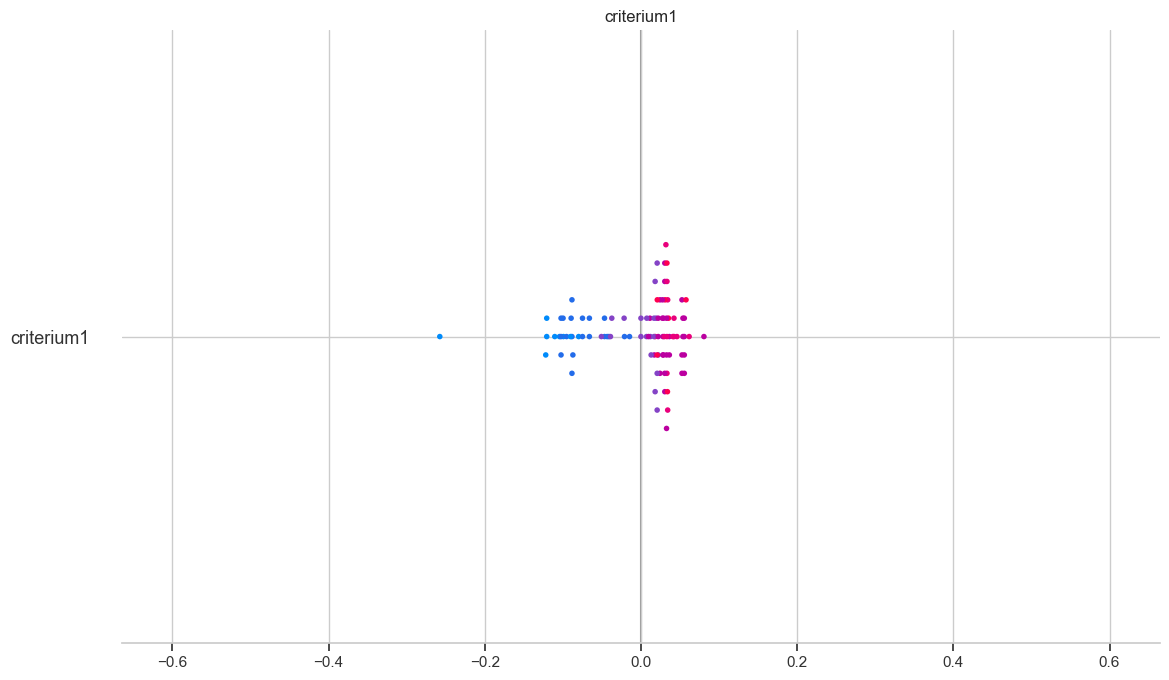

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_112
Received: inputs=['Tensor(shape=(50, 4))']
  warnings.warn(msg)
C:\Users\oskki\AppData\Local\Temp\ipykernel_1304\1727098718.py:55: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sh

<Figure size 640x480 with 0 Axes>

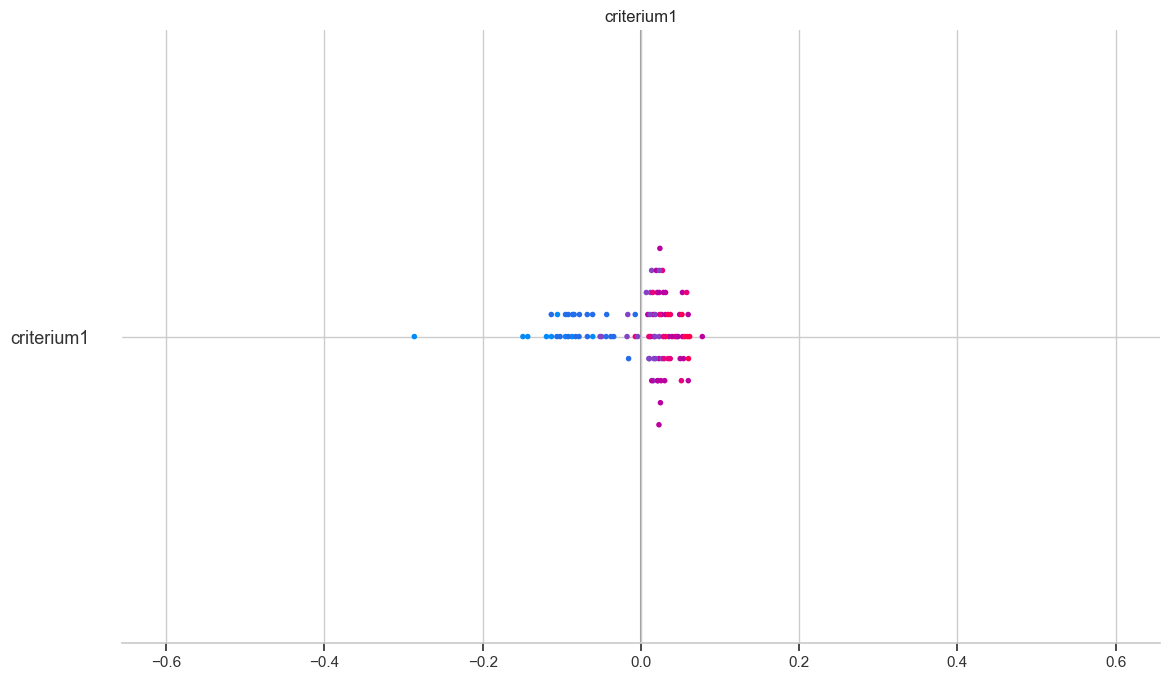


Explanation for test instance index 4:
Indice: 4, Features: [0.666667 0.666667 0.666667 0.666667], Class: 1, Probability: 0.9998


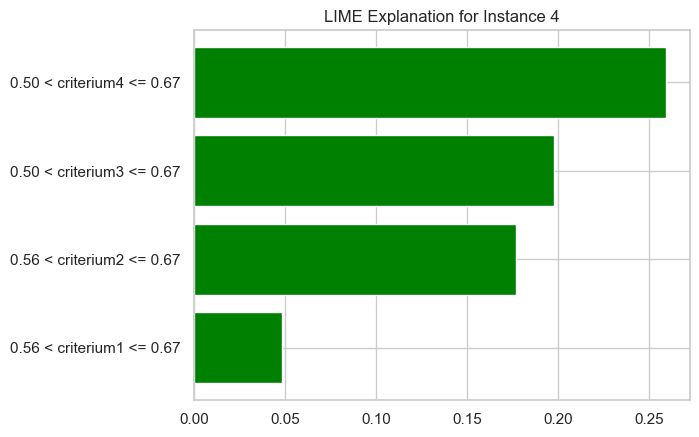


Explanation for test instance index 58:
Indice: 58, Features: [0.555556 0.333333 0.5      0.833333], Class: 1, Probability: 0.8732


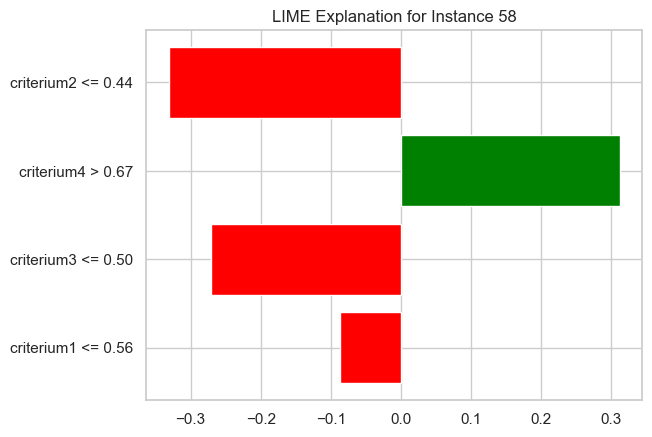


Explanation for test instance index 20:
Indice: 20, Features: [0.333333 0.333333 0.333333 0.333333], Class: 0, Probability: 0.1875


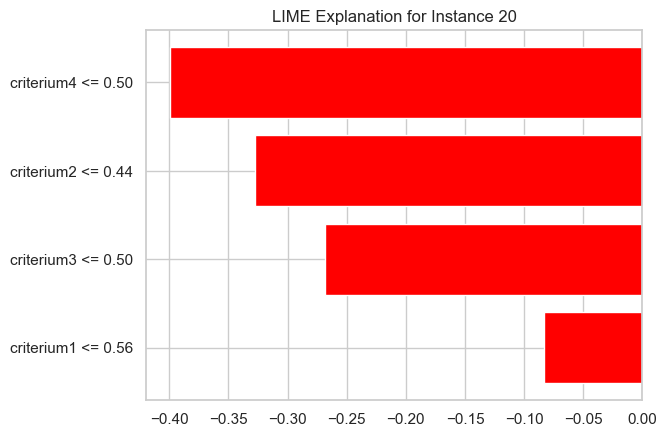


Instance 4 minimal change to flip class:
  Changed feature: criterium4
  Original value: 0.6667
  New value: 0.3667
  Change (delta): -0.3000
  Flipped to class: 0

Instance 58 minimal change to flip class:
  Changed feature: criterium2
  Original value: 0.3333
  New value: 0.2433
  Change (delta): -0.0900
  Flipped to class: 0

Instance 20 minimal change to flip class:
None
No change found to flip the class.


In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import shap
import matplotlib.pyplot as plt

df = pd.read_csv('data/employee selection.csv')
feature_names = [f'criterium{i+1}' for i in range(df.shape[1] - 1)]
df.columns = feature_names + ['target']
X = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values.astype(int)

y = (y_raw >= 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=0)

y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"ANN - Accuracy: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

explainer = shap.DeepExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100], feature_names=df.columns[:-1])

explainer = shap.GradientExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100], feature_names=df.columns[:-1])

import lime
import lime.lime_tabular

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    class_names=['class_0', 'class_1'],
    mode='classification'
)

np.random.seed(69)
indices = np.random.choice(len(X_test), size=3, replace=False)

def predict_fn_proba(x):
    proba_class_1 = model.predict(x, verbose=0).flatten()
    proba_class_0 = 1 - proba_class_1
    return np.vstack([proba_class_0, proba_class_1]).T

for i in indices:
    print(f"\nExplanation for test instance index {i}:")
    print(f"Indice: {i}, Features: {X_test[i]}, Class: {y_test[i]}, Probability: {y_prob[i]:.4f}")
    exp = explainer_lime.explain_instance(
        data_row=X_test[i],
        predict_fn=predict_fn_proba,
        num_features=4
    )
    exp.show_in_notebook(show_table=True)
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Instance {i}")
    plt.show()

def minimal_change_for_flip(instance, model, feature_names, step=0.01, max_change=1.0):
    original_class = (model.predict(instance.reshape(1, -1), verbose=0) > 0.5).astype(int)[0][0]
    best_flip = None
    for i in range(len(instance)):
        for delta in np.arange(-max_change, max_change + step, step):
            new_instance = instance.copy()
            new_instance[i] = np.clip(instance[i] + delta, 0.0, 1.0)
            new_class = (model.predict(new_instance.reshape(1, -1), verbose=0) > 0.5).astype(int)[0][0]
            if new_class != original_class:
                if best_flip is None or abs(delta) < abs(best_flip['delta']):
                    best_flip = {
                        'changed_feature': feature_names[i],
                        'original_value': float(instance[i]),
                        'new_value': float(new_instance[i]),
                        'delta': float(delta),
                        'flipped_to': int(new_class)
                    }
    return best_flip

for i in indices:
    instance = X_test[i]
    result = minimal_change_for_flip(instance, model, feature_names)
    print(f"\nInstance {i} minimal change to flip class:")
    if result:
        print(f"  Changed feature: {result['changed_feature']}")
        print(f"  Original value: {result['original_value']:.4f}")
        print(f"  New value: {result['new_value']:.4f}")
        print(f"  Change (delta): {result['delta']:.4f}")
        print(f"  Flipped to class: {result['flipped_to']}")
    else:
        print(result)
        print("No change found to flip the class.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|█         | 1/10 [00:00<00:02,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 20%|██        | 2/10 [00:00<00:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 30%|███       | 3/10 [00:00<00:01,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 40%|████      | 4/10 [00:00<00:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 50%|█████     | 5/10 [00:01<00:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 60%|██████    | 6/10 [00:01<00:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 70%|███████   | 7/10 [00:01<00:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 80%|████████  | 8/10 [00:01<00:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 90%|█████████ | 9/10 [00:02<00:00,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
C:\Users\oskki\AppData\Local\Temp\ipykernel_4416\2076990188.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, shap.sample(X_test, 10), feature_names=feature_names)
C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

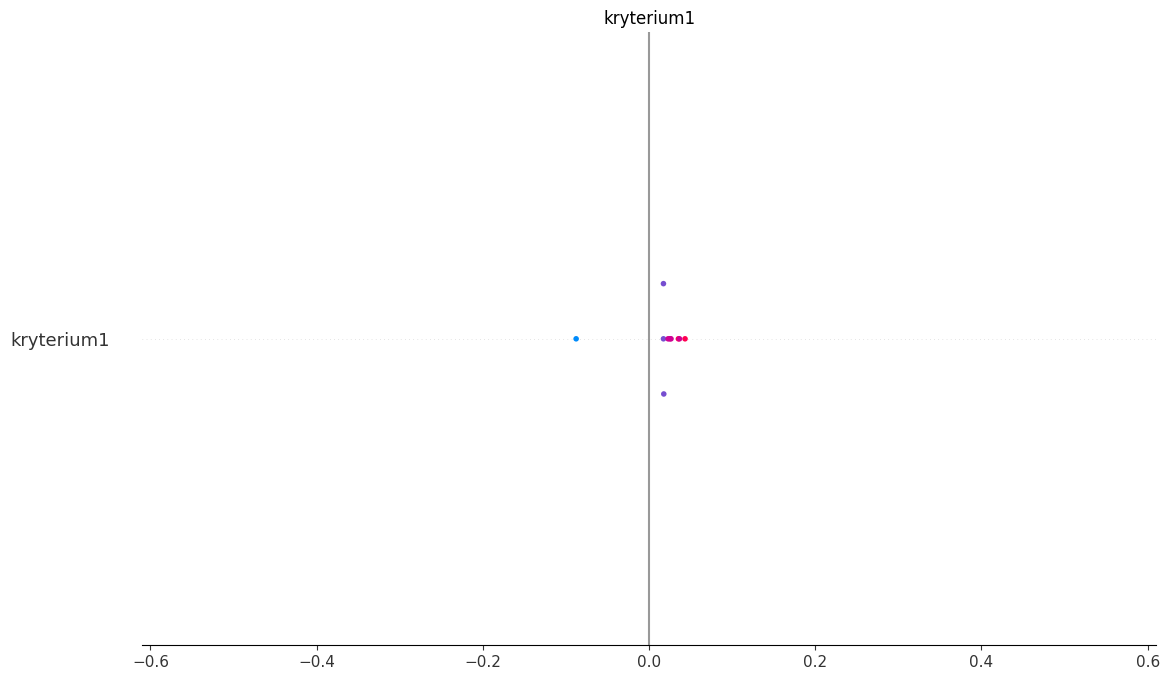

In [34]:
import shap

explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 100))
shap_values = explainer.shap_values(shap.sample(X_test, 10))

shap.summary_plot(shap_values, shap.sample(X_test, 10), feature_names=feature_names)

C:\Users\oskki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Accuracy: 0.9456
F1 score: 0.9604
AUC: 0.9848


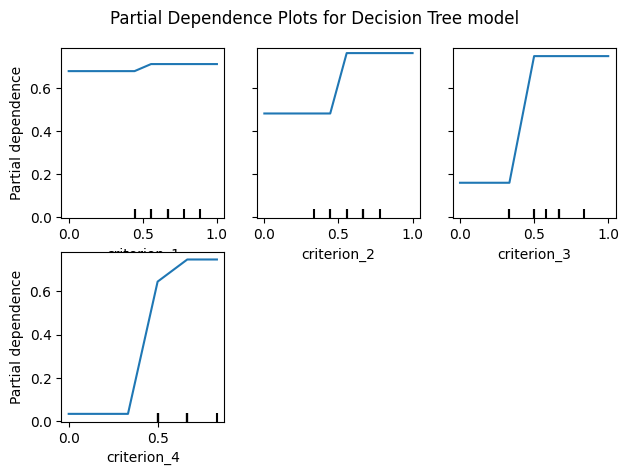

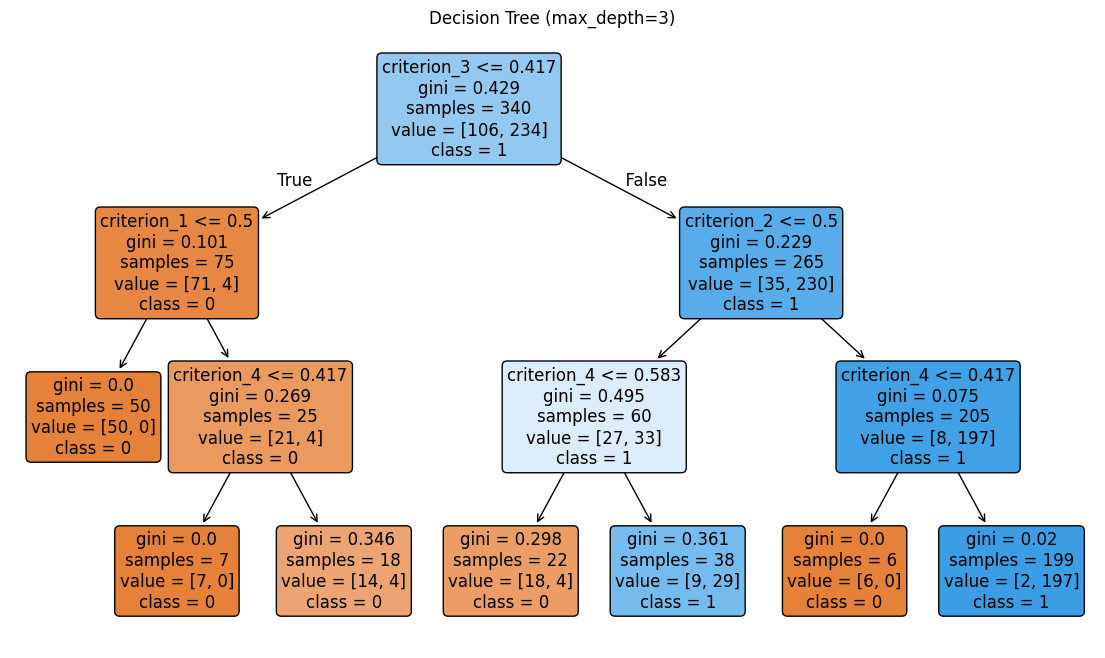

Ważność cechy criterion_1: 0.0074
Ważność cechy criterion_2: 0.1358
Ważność cechy criterion_3: 0.6720
Ważność cechy criterion_4: 0.1848


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('data/employee selection.csv')

df.columns = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4', 'class']
df['binary_class'] = (df['class'] >= 5).astype(int)
feature_names = ['criterion_1', 'criterion_2', 'criterion_3', 'criterion_4']
X = df[feature_names].values
y = df['binary_class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

PartialDependenceDisplay.from_estimator(dt_model, X_train, features=[0,1,2,3],
                                       feature_names=feature_names, grid_resolution=20)
plt.suptitle("Partial Dependence Plots for Decision Tree model")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
plot_tree(dt_model, feature_names=feature_names, class_names=['0', '1'],
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree (max_depth=3)")
plt.show()

importances = dt_model.feature_importances_
for f, imp in zip(feature_names, importances):
    print(f"Ważność cechy {f}: {imp:.4f}")


### Metryki
**Accuracy:** 0.9456  
**F1 score:** 0.9604  
**AUC:** 0.9848

Wizualizacje drzewa oraz PDP powyżej. Guided gradient explain do bólu wskazuje na rozkład wartości. Każde kryterium miało bardzo podobny rozkład wartości i widać mocną zależność między jednym a drugim. Oś X wskazująca wartość SHAP wpływającą na decyzję wskazuje, że wyższe (różowe i fioletowe kolory) wartości wpływają na przynależność do klasy 1.

PDP wykazuje niewielkie znaczenie kryterium 1, to samo potwierdza drzewo. Kryterium 3 najprościej oddziela klasy, co wskazuje na jego ważność w drzewie. PDP wykazuje dużą zmianę wartości dla kryterium 4.

---

### Explanation for test instance index 4:
| Criterium | Value |
|----------|--------|
| criterium1 | 0.67 |
| criterium2 | 0.67 |
| criterium3 | 0.67 |
| criterium4 | 0.67 |

Wszystkie kryteria mają wysokie wartości, szczególnie średnie z rozkładu wartości dla każdego kryterium, stąd też zostanie zaklasyfikowane jako klasa 1. Z guided gradient widzimy, że prawie każda wartość powyżej 0.5 przesuwa nas bliżej klasy 1.

**Class prediction**: 1  
**Probability**: 0.9996

Minimalna zmiana tutaj jest ciężka. Zakładam, że zmiana jednego (najważniejszego) kryterium spowoduje zmianę klasyfikacji. Ze względu na bardzo wysokie prawdopodobieństwo (0.9996) klasy 1 ta zmiana będzie musiała być duża. Zapewne będzie to kryterium 3 lub 4, co wykazują PDP i drzewo.

**Instance 4 minimal change to flip class:**
```
Changed feature: criterium4  
Original value: 0.6667  
New value: 0.3667  
Change (delta): -0.3000  
Flipped to class: 0
```

---

### Explanation for test instance index 58:
| Criterium | Value |
|----------|--------|
| criterium1 | 0.56 |
| criterium2 | 0.33 |
| criterium3 | 0.50 |
| criterium4 | 0.83 |

Podobna sytuacja co poprzednio. Większość jest ponad 0.5, prócz jednego kryterium 2. Jednak kryterium 1 i 3 jest poniżej swoich szczytów dla 70% klasy większościowej. Przypadek jest prawdopodobnie klasy 1.

**Class prediction**: 1  
**Probability**: 0.7417

By zmienić klasę potrzebujemy tak naprawdę małego ruchu, który nam przeważy na korzyść klasy 0. Ze względu na wykresy PDP wydaje mi się, że mało prawdopodobnym będzie by zmienianym kryterium było kryterium 3 czy 4, ze względu na ich wykresy i duże wahania. Zmiana musiałaby nastąpić znaczna, aby uzyskać spadek prawdopodobieństwa klasy 1. Wykres dla kryterium 1 raczej też świadczy o braku większej ingerencji. Stąd zakładam, że będzie to kryterium 2.

**Instance 58 minimal change to flip class:**
```
Changed feature: criterium2  
Original value: 0.3333  
New value: 0.2433  
Change (delta): -0.0900  
Flipped to class: 0
```

---

### Explanation for test instance index 20:
| Criterium | Value |
|----------|--------|
| criterium1 | 0.33 |
| criterium2 | 0.33 |
| criterium3 | 0.33 |
| criterium4 | 0.33 |

Wszystkie kryteria na bardzo niskim poziomie, znacznie poniżej średnich. Instancja zostanie zaklasyfikowana jako klasa 0.

**Class prediction**: 0  
**Probability**: 0.0004

Przykład bardzo mocno reprezentatywny dla klasy 0 (prawdopodobieństwo = 0.0004). Nie jestem pewien, czy zmiana nawet najbardziej znaczącego kryterium wpłynie tutaj na decyzję ogólną. Nie rozpatrując nawet niewiele znaczącego kryterium 1, choćbyśmy zmieniali kryterium najbardziej znaczące tj. 3 lub 4, uzyskamy maksymalnie poprawę na jednym z kryteriów o 0,67. Zakładam, że albo będzie to taka właśnie zmiana z 0.33 → 1.0 dla kryterium 3 lub 4, albo nie będzie takiej poprawy, która zmieniłaby klasyfikację.

**Instance 20 minimal change to flip class:**
```
None  
No change found to flip the class.
```

---

### Czy na podstawie uzyskanych parametrów możemy powiedzieć coś o preferencjach użytkowników?

Można zaobserwować, że 3 i 4 kryterium są znaczące. Zobaczyć to można w rozpatrywaniu przykładu środkowego (tj. 58 indeks). Przeciętny wynik na 4 kryterium przesuwa nas aż o 0,25 prawdopodobieństwa dla klasy 1. Dodatkowo widzimy, że średnie kryterium 3 (wartość = 0,5) nie jest wystarczająca i dalej przeważa na koszt prawdopodobieństwa klasy 0, a więc jest to ważny aspekt.

---

### Jaki jest wpływ każdego z kryteriów? Czy są jakieś kryteria, które nie mają żadnego znaczenia, czy też mają wpływ decydujący?

To co można powiedzieć na pewno to, że kryterium 1, nieważne jakie by nie było, nie ma wielkiego wpływu. Widać to w każdym z rozpatrywanych przypadków. W zależności od wartości pozostałe kryteria mają podobne efekty na wynik, z czego najbardziej zauważone wcześniej kryteria 3 i 4 (chociaż 4 mogło być spowodowane dużą jego wartością dla tego przypadku).

---

### Jaki jest charakter danego kryterium: zysk, koszt, niemonotoniczne?

Jest to ciężkie do oceny, ponieważ sieć nie daje jasnego poglądu na to. Jednakże PDP oraz analiza SHAP i zachowanie przykładów wskazują na to, że wszystkie kryteria są typu **zysk**, monotonicznie rosnące.

---

### Czy istnieją jakieś progi preferencji? Czy istnieją oceny kryteriów, które są nierozróżnialne z punktu widzenia preferencji?

Ponownie, istnieją takie zmiany, dla których nie zmieni się wynik, a względem wyniku będą przykłady nierozróżnialne. Przykładem tu ostatnia instancja indeksu 20 – zmiana czegokolwiek nie zmieni decyzji o tym, że ostateczna klasyfikacja przypisuje klasę 0. Istnieją jednak pewne **progi**, po których przejściu otrzymamy zmianę klasy, wykazaną dla pozostałych dwóch instancji. Możliwe do oszacowania na bazie analizy zmian predykcji dla cech.

---

### Czy wyniki uzyskane z tych technik pokrywają się z analizą wykonaną w poprzednim punkcie?

PDP dobrze ukazuje, że kryterium 1 nie jest bardzo znaczące jeśli chodzi o ocenę końcową. Stąd można wnioskować, że niewielka różnica wynikająca z poziomów nie wpłynie również (w większości przypadków) na wynik – **nierozróżnialność**. Duże wahania dla kryterium 3 i 4 pokazują, że zmiany na tych kryteriach mogą drastycznie wpływać na wynik końcowy, co za tym idzie może istnieć pewna **preferencja**.